In [1]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
os.listdir('/anvar/public_datasets/tcia/manifest-1614264588831/')

['DirectoryNamesMappingModality.csv',
 'metadata.csv',
 'Vestibular-Schwannoma-SEG']

In [3]:
# os.mkdir('/anvar/public_datasets/preproc_study/schw/dicom/')

In [4]:
schw_paths = pd.read_csv('/anvar/public_datasets/tcia/manifest-1614264588831/DirectoryNamesMappingModality.csv')

In [5]:
schw_paths['Modality'].value_counts()

T1 image       242
T2 image       242
T1 RTSTRUCT    242
T2 RTSTRUCT    242
T1 RTPLAN      242
T2 RTPLAN      242
T1 RTDOSE      242
T2 RTDOSE      242
Name: Modality, dtype: int64

In [6]:
schw_paths['Descriptive Directory Name'].iloc[0].split('/')[0]

'VS-SEG-001'

In [7]:
basedir  = '/anvar/public_datasets/tcia/manifest-1614264588831/Vestibular-Schwannoma-SEG/'
savedir  = '/anvar/public_datasets/preproc_study/schw/dicom/'

In [48]:
dcm_path = basedir + 'VS-SEG-003' + '/10-13-1994-NA-Avanto RoutineImage Guidance-58950/2.000000-t1fl3dtragkv1-84889/1-047.dcm'

In [50]:
from pydicom import dcmread

dcmread(dcm_path)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.230755017752056251744230577034095961484
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '19941013'
(0008, 0013) Instance Creation Time              TM: '093902.531000'
(0008, 0016) SOP Class UID  

In [46]:
# create folder
# if Modality, save folder

for i in range(0, len(schw_paths)):
    patient = schw_paths['Descriptive Directory Name'].iloc[i].split('/')[0]
    try:
#         os.mkdir(savedir + patient)
        if schw_paths['Modality'].iloc[i] == 'T1 image':
            print(patient)
            folder_to_copy = glob(basedir + patient + '/**/*' + schw_paths['Descriptive Directory Name'].iloc[i].split('/')[-1])
            assert(len(folder_to_copy) == 1)
            shutil.copytree(folder_to_copy[0], savedir + patient + '/T1/') 
            
        if schw_paths['Modality'].iloc[i] == 'T2 image':
            folder_to_copy = glob(basedir + patient + '/**/*' + schw_paths['Descriptive Directory Name'].iloc[i].split('/')[-1])
            assert(len(folder_to_copy) == 1)
            shutil.copytree(folder_to_copy[0], savedir + patient + '/T2/') 
            
        if schw_paths['Modality'].iloc[i] == 'T1 RTSTRUCT':
            folder_to_copy = glob(basedir + patient + '/**/*' + schw_paths['Descriptive Directory Name'].iloc[i].split('/')[-1])
            assert(len(folder_to_copy) == 1)
            shutil.copytree(folder_to_copy[0], savedir + patient + '/RTSTRUCT/')
        
    except OSError as error:
        print(error) 
        pass  

VS-SEG-001


NameError: name 'glob' is not defined

In [65]:
os.listdir(savedir + '/VS-SEG-006/RTSTRUCT')

['1-1.dcm']

In [63]:
len(os.listdir(savedir))

242

### Check orientation in folders:

In [4]:
import os
import ants

In [14]:
path1 = '/anvar/public_datasets/preproc_study/schw/orig/'

In [67]:
path = '/anvar/public_datasets/preproc_study/schw/1_reg/'
# os.listdir(path +'VS-SEG-157')
reg = ants.image_read(path +'VS-SEG-157/T1_SEG.nii.gz')

In [54]:
path = '/anvar/public_datasets/preproc_study/schw/orig/'
# os.listdir(path +'VS-SEG-157')
orig = ants.image_read(path +'VS-SEG-157/T1_SEG.nii.gz').reorient_image2('RPI')

In [61]:
os.listdir('/anvar/public_datasets/preproc_study/schw/')

['dicom',
 '4a_resamp.json',
 '3a_atlas',
 'orig',
 '3b_n4',
 '5_ss_shared',
 '2a_interp',
 '3d_susan',
 '4d_susan',
 '4a_resamp',
 '1_reg_check',
 '1_reg',
 '4b_n4']

In [69]:
path = '/anvar/public_datasets/preproc_study/schw/4a_resamp/'
resamp = ants.image_read(path +'VS-SEG-157/T1_SEG.nii.gz')

path = '/anvar/public_datasets/preproc_study/schw/1_reg_check/'
reg_check = ants.image_read(path +'VS-SEG-157/T1_SEG.nii.gz')

In [70]:
resamp

ANTsImage (LAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (210, 210, 180)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (99.0554, -126.5958, -79.1036)
	 Direction  : [-1.  0.  0.  0.  1.  0.  0.  0.  1.]

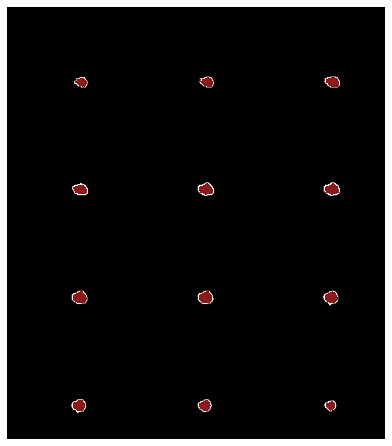

In [56]:
ants.plot(orig, reg)

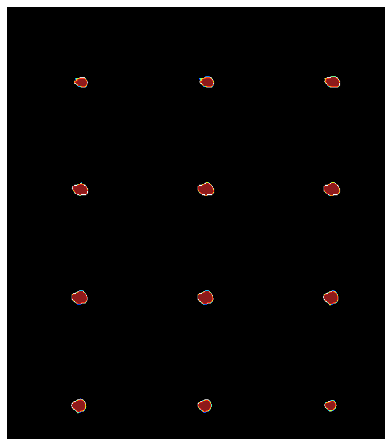

In [57]:
ants.plot(orig, resamp)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
def plot_qc(image, mask, patient_id= 'lol'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.plot()

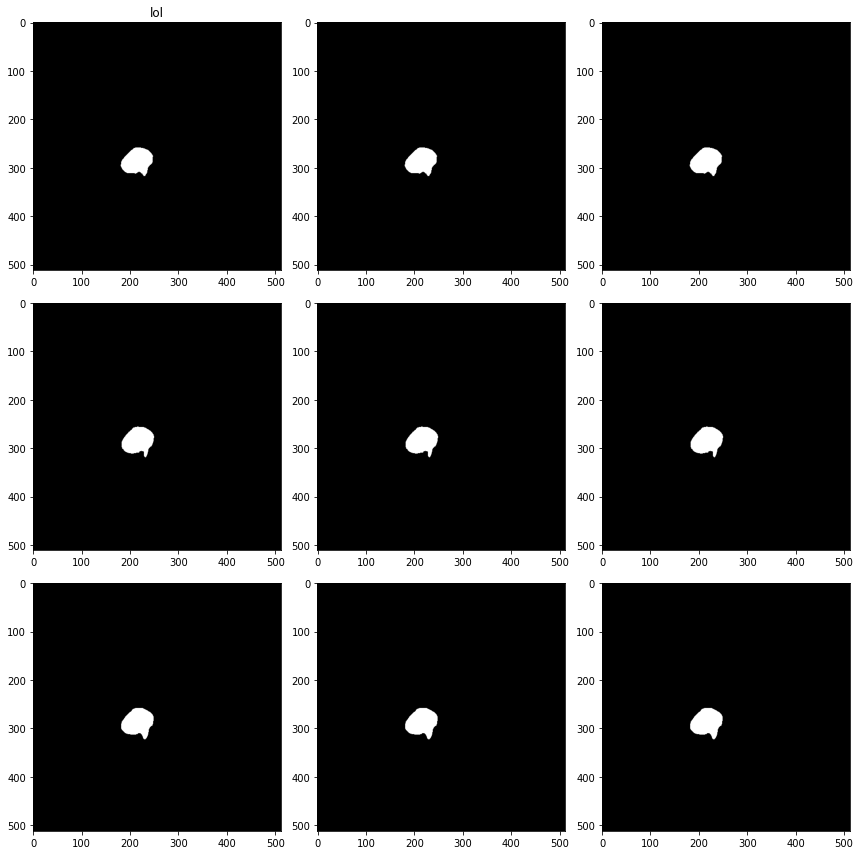

In [59]:
plot_qc(reg.numpy(), orig.numpy())

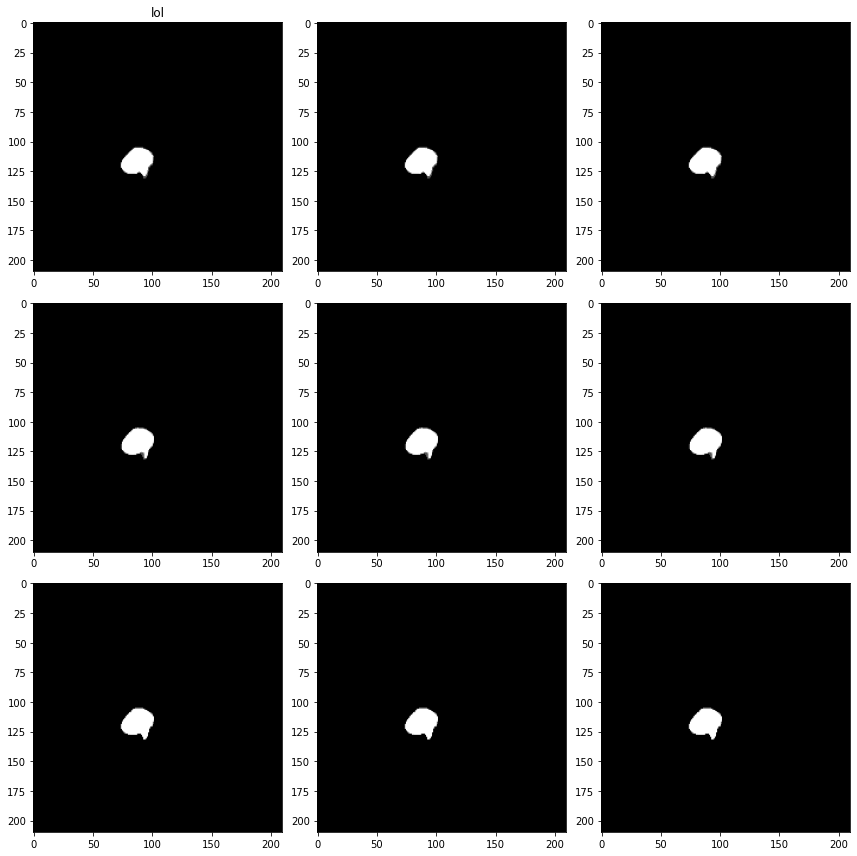

In [60]:
plot_qc(resamp.numpy(), resamp.numpy())

### Check is mask is continious

In [8]:
path = '/anvar/public_datasets/preproc_study/schw/orig/'

In [9]:
os.listdir('/anvar/public_datasets/preproc_study/schw/')

['dicom',
 '4a_resamp.json',
 '3a_atlas',
 'orig',
 '3b_n4',
 '5_ss_shared',
 '2a_interp',
 '3d_susan',
 '4d_susan',
 '4a_resamp',
 '1_reg_check',
 '1_reg',
 '4b_n4']

In [17]:
base_dir = '/anvar/public_datasets/preproc_study/schw/4a_resamp/'
mask = 'T1_SEG.nii.gz'

for patient in tqdm.tqdm(os.listdir(base_dir)):
    if not patient == 'logging.txt':
        for modality in ['T1.nii.gz','T2.nii.gz', mask]:
            img = ants.image_read('/anvar/public_datasets/preproc_study/schw/1_reg/{}/{}'.format(patient, modality))
            
            if modality == 'T1.nii.gz':
                t1_shape = np.shape(img.numpy())
                
            if modality == 'T2.nii.gz':
                t2_shape = np.shape(img.numpy())
            
            if modality == mask:
                print(np.unique(img.numpy()))
                if len(np.unique(img.numpy())) > 2:
                    print(patient, np.unique(img.numpy()))
                mask_shape = np.shape(img.numpy())
                
            if not img.sum() > 0:
                print(patient, modality, 'Amount of nans:', np.shape(np.argwhere(np.isnan(img.numpy()))))
        
        if (t1_shape != t2_shape) | (t1_shape != mask_shape):
            print(patient, ' t1', t1_shape, ' t2', t2_shape, ' mask', mask_shape)

  0%|          | 0/243 [00:00<?, ?it/s]

[0. 1.]


  0%|          | 1/243 [00:04<19:33,  4.85s/it]

[0. 1.]


  1%|          | 2/243 [00:09<19:31,  4.86s/it]

[0. 1.]


  1%|          | 3/243 [00:14<19:25,  4.86s/it]

[0. 1.]


  2%|▏         | 4/243 [00:19<19:17,  4.84s/it]

[0. 1.]


  2%|▏         | 5/243 [00:25<21:06,  5.32s/it]

[0. 1.]


  2%|▏         | 6/243 [00:30<20:37,  5.22s/it]

[0. 1.]


  3%|▎         | 7/243 [00:37<22:49,  5.80s/it]

[0. 1.]


  3%|▎         | 8/243 [00:43<22:38,  5.78s/it]

[0. 1.]


  4%|▎         | 9/243 [00:51<24:58,  6.40s/it]

[0. 1.]


  4%|▍         | 10/243 [00:58<26:00,  6.70s/it]

[0. 1.]


  5%|▍         | 11/243 [01:04<24:05,  6.23s/it]

[0. 1.]


  5%|▍         | 12/243 [01:10<24:18,  6.31s/it]

[0. 1.]


  5%|▌         | 13/243 [01:16<23:36,  6.16s/it]

[0. 1.]


  6%|▌         | 14/243 [01:22<23:22,  6.13s/it]

[0. 1.]


  6%|▌         | 15/243 [01:27<22:35,  5.95s/it]

[0. 1.]


  7%|▋         | 16/243 [01:33<22:08,  5.85s/it]

[0. 1.]


  7%|▋         | 17/243 [01:40<22:54,  6.08s/it]

[0. 1.]


  7%|▋         | 18/243 [01:47<23:39,  6.31s/it]

[0. 1.]


  8%|▊         | 19/243 [01:55<25:30,  6.83s/it]

[0. 1.]


  8%|▊         | 20/243 [02:00<23:27,  6.31s/it]

[0. 1.]


  9%|▊         | 21/243 [02:06<23:10,  6.27s/it]

[0. 1.]


  9%|▉         | 22/243 [02:12<22:44,  6.17s/it]

[0. 1.]


  9%|▉         | 23/243 [02:21<25:51,  7.05s/it]

[0. 1.]


 10%|▉         | 24/243 [02:27<24:30,  6.72s/it]

[0. 1.]


 10%|█         | 25/243 [02:33<23:42,  6.53s/it]

[0. 1.]


 11%|█         | 26/243 [02:38<22:07,  6.12s/it]

[0. 1.]


 11%|█         | 27/243 [02:43<20:44,  5.76s/it]

[0. 1.]


 12%|█▏        | 28/243 [02:49<20:25,  5.70s/it]

[0. 1.]


 12%|█▏        | 29/243 [02:55<20:56,  5.87s/it]

[0. 1.]


 12%|█▏        | 30/243 [03:00<19:53,  5.61s/it]

[0. 1.]


 13%|█▎        | 31/243 [03:06<19:52,  5.62s/it]

[0. 1.]


 13%|█▎        | 32/243 [03:11<19:56,  5.67s/it]

[0. 1.]


 14%|█▎        | 33/243 [03:17<19:24,  5.55s/it]

[0. 1.]


 14%|█▍        | 34/243 [03:23<19:50,  5.69s/it]

[0. 1.]


 14%|█▍        | 35/243 [03:28<19:32,  5.63s/it]

[0. 1.]


 15%|█▍        | 36/243 [03:34<19:17,  5.59s/it]

[0. 1.]


 15%|█▌        | 37/243 [03:40<20:28,  5.96s/it]

[0. 1.]


 16%|█▌        | 38/243 [03:46<20:05,  5.88s/it]

[0. 1.]


 16%|█▌        | 39/243 [03:54<22:09,  6.51s/it]

[0. 1.]


 16%|█▋        | 40/243 [04:00<21:13,  6.27s/it]

[0. 1.]


 17%|█▋        | 41/243 [04:05<19:49,  5.89s/it]

[0. 1.]


 17%|█▋        | 42/243 [04:10<18:35,  5.55s/it]

[0. 1.]


 18%|█▊        | 43/243 [04:15<18:12,  5.46s/it]

[0. 1.]


 18%|█▊        | 44/243 [04:20<18:10,  5.48s/it]

[0. 1.]


 19%|█▊        | 45/243 [04:26<18:08,  5.50s/it]

[0. 1.]


 19%|█▉        | 46/243 [04:32<19:03,  5.80s/it]

[0. 1.]


 19%|█▉        | 47/243 [04:38<19:09,  5.86s/it]

[0. 1.]


 20%|█▉        | 48/243 [04:47<21:33,  6.63s/it]

[0. 1.]


 20%|██        | 49/243 [04:53<20:45,  6.42s/it]

[0. 1.]


 21%|██        | 50/243 [04:59<20:46,  6.46s/it]

[0. 1.]


 21%|██        | 51/243 [05:06<20:29,  6.41s/it]

[0. 1.]


 21%|██▏       | 52/243 [05:12<20:24,  6.41s/it]

[0. 1.]


 22%|██▏       | 53/243 [05:18<19:28,  6.15s/it]

[0. 1.]


 22%|██▏       | 54/243 [05:23<18:47,  5.97s/it]

[0. 1.]


 23%|██▎       | 55/243 [05:28<17:54,  5.72s/it]

[0. 1.]


 23%|██▎       | 56/243 [05:34<17:31,  5.63s/it]

[0. 1.]


 23%|██▎       | 57/243 [05:39<17:00,  5.49s/it]

[0. 1.]


 24%|██▍       | 58/243 [05:44<16:36,  5.39s/it]

[0. 1.]


 24%|██▍       | 59/243 [05:50<16:50,  5.49s/it]

[0. 1.]


 25%|██▍       | 60/243 [05:55<16:23,  5.38s/it]

[0. 1.]


 25%|██▌       | 61/243 [06:00<16:23,  5.40s/it]

[0. 1.]


 26%|██▌       | 62/243 [06:11<21:17,  7.06s/it]

[0. 1.]


 26%|██▌       | 63/243 [06:18<20:44,  6.92s/it]

[0. 1.]


 26%|██▋       | 64/243 [06:25<20:46,  6.96s/it]

[0. 1.]


 27%|██▋       | 65/243 [06:30<19:25,  6.55s/it]

[0. 1.]


 27%|██▋       | 66/243 [06:37<18:59,  6.44s/it]

[0. 1.]


 28%|██▊       | 67/243 [06:42<17:57,  6.12s/it]

[0. 1.]


 28%|██▊       | 68/243 [06:50<19:22,  6.64s/it]

[0. 1.]


 28%|██▊       | 69/243 [06:55<18:00,  6.21s/it]

[0. 1.]


 29%|██▉       | 70/243 [07:01<17:22,  6.02s/it]

[0. 1.]


 29%|██▉       | 71/243 [07:09<17:19,  6.04s/it]


KeyboardInterrupt: 

In [20]:
os.listdir('/anvar/public_datasets/preproc_study/schw/1_reg/VS-SEG-003')

['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']

In [27]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/schw/1_reg/{}/{}'.format('VS-SEG-003', 'T1_SEG.nii.gz'))
img_t1 = ants.image_read('/anvar/public_datasets/preproc_study/schw/1_reg/{}/{}'.format('VS-SEG-003', 'T1.nii.gz'))
img_t2 = ants.image_read('/anvar/public_datasets/preproc_study/schw/1_reg/{}/{}'.format('VS-SEG-003', 'T2.nii.gz'))

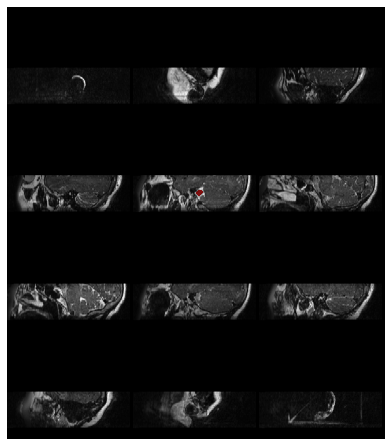

In [29]:
ants.plot(img_t2, mask)

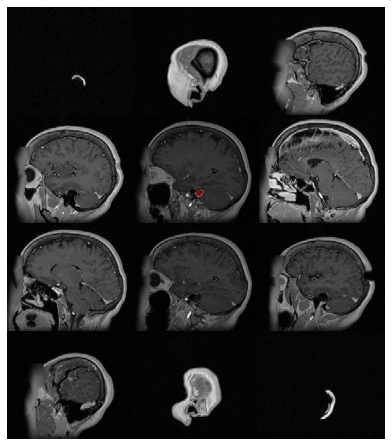

In [28]:
ants.plot(img_t1, mask)

In [30]:
from dpipe.im.visualize import slice3d
slice3d(img_t2.numpy(), mask.numpy())

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=119), Output()), _dom…

In [36]:
slice3d(ants.reorient_image2(img_t1, 'RAS').numpy())

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=119), Output()), _dom…

In [31]:
slice3d(img_t1.numpy(), mask.numpy())

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=119), Output()), _dom…